In [1]:
%pip install pandas matplotlib numpy seaborn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------- ------------------- 4.2/8.1 MB 25.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.7 MB/s eta 0:00:00
Using cached numpy-2.2.3-cp312-cp312-win_amd64.whl (12.6 MB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 25.2 MB/s eta 0:00:00
Using cache

Successfully loaded data with 1112 rows.
X position range: 42 to 2041
Y position range: 0 to 945


<Figure size 1200x1000 with 0 Axes>

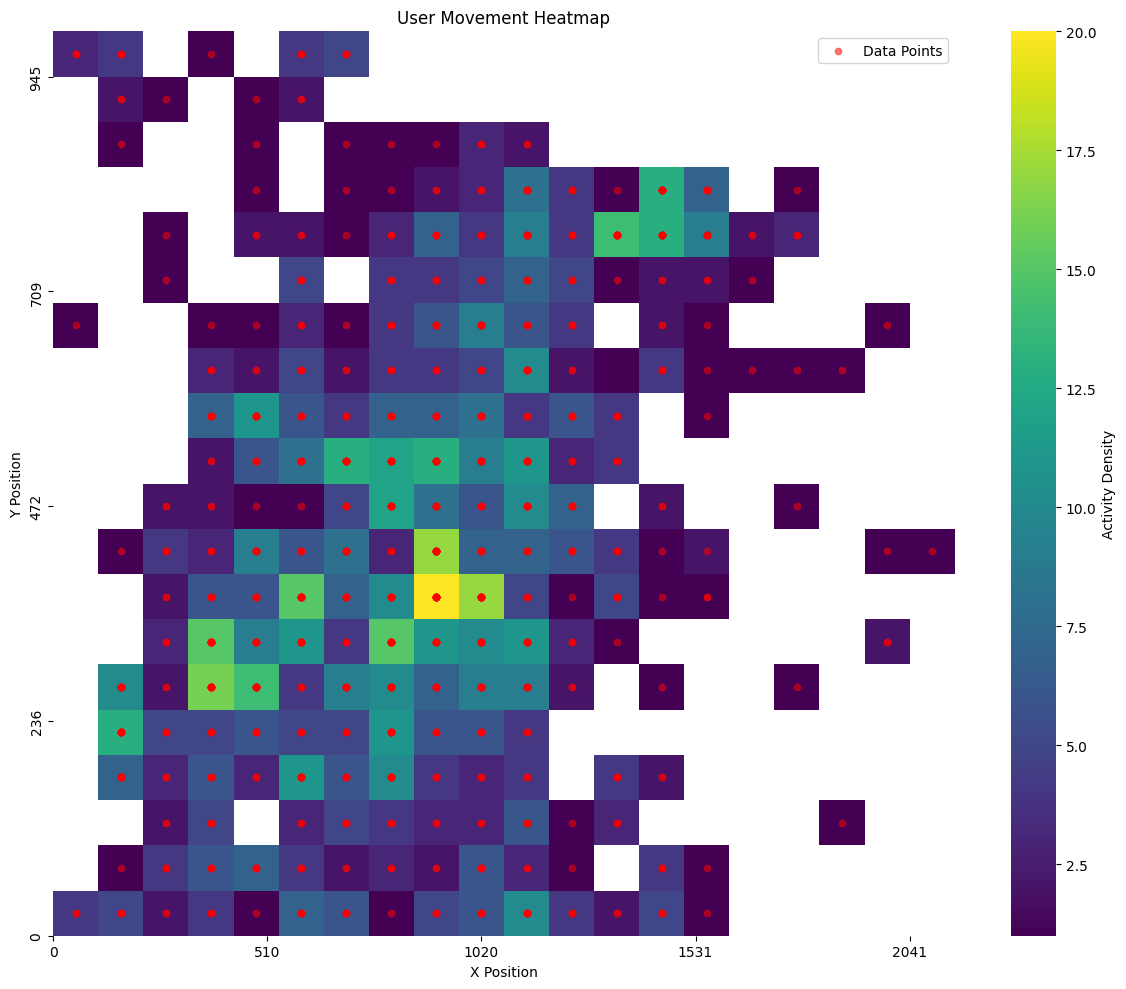

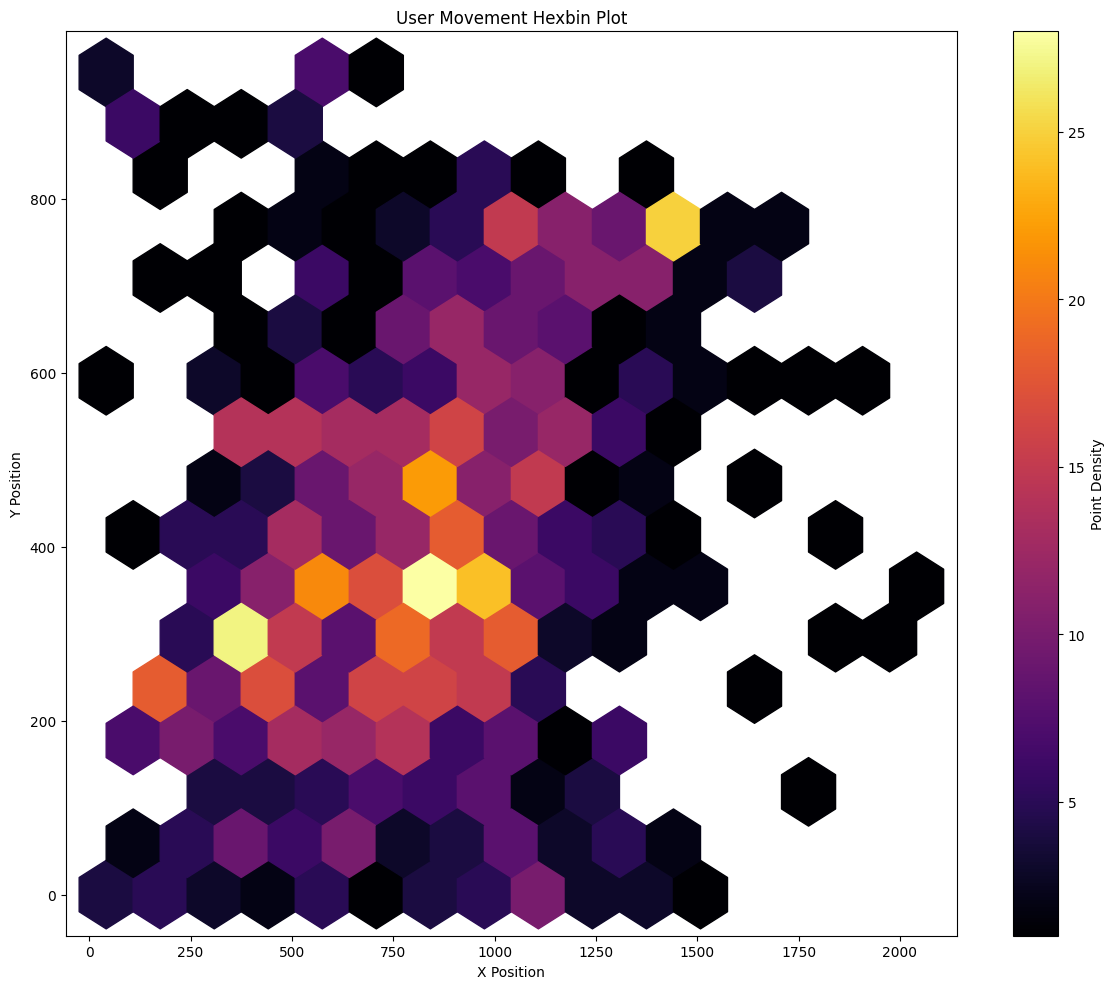

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# File path - update this to your CSV file location
file_path = 'MouseMovement.csv'  # Change this to your actual file path

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found. Please check the path.")
    exit()

# Read the CSV data from file
try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded data with {len(df)} rows.")
except Exception as e:
    print(f"Error reading CSV file: {e}")
    exit()

# Convert position columns to numeric, handling any potential errors
df['xPos'] = pd.to_numeric(df['xPos'], errors='coerce')
df['yPos'] = pd.to_numeric(df['yPos'], errors='coerce')

# Drop any rows with missing position data
if df['xPos'].isna().any() or df['yPos'].isna().any():
    missing_count = df['xPos'].isna().sum() + df['yPos'].isna().sum()
    print(f"Warning: Found {missing_count} rows with invalid position data. These will be excluded.")
    df = df.dropna(subset=['xPos', 'yPos'])

# Print data summary
print(f"X position range: {df['xPos'].min()} to {df['xPos'].max()}")
print(f"Y position range: {df['yPos'].min()} to {df['yPos'].max()}")

# Create the figure and axis
plt.figure(figsize=(12, 10))

# Get the maximum x and y values to set our bin ranges
max_x = df['xPos'].max()
max_y = df['yPos'].max()

# Create a 2D histogram with appropriate bins (adjust as needed)
heatmap, xedges, yedges = np.histogram2d(
    df['xPos'], 
    df['yPos'], 
    bins=[20, 20],
    range=[[0, max_x], [0, max_y]]
)

# We need to transpose the heatmap for proper orientation in imshow
heatmap = heatmap.T

# Create a mask for zero values to make them transparent
mask = heatmap == 0

# Create the heatmap using seaborn for better aesthetics
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    heatmap,
    cmap='viridis',  # Color scheme: viridis is good for intensity visualization
    mask=mask,       # Make zero values transparent
    cbar_kws={'label': 'Activity Density'}
)

# Adjust the axis labels and ticks
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('User Movement Heatmap')

# Adjust ticks to show actual position values
x_tick_positions = np.linspace(0, len(xedges)-2, 5)
y_tick_positions = np.linspace(0, len(yedges)-2, 5)
x_tick_labels = np.round(np.linspace(xedges[0], xedges[-1], 5)).astype(int)
y_tick_labels = np.round(np.linspace(yedges[0], yedges[-1], 5)).astype(int)

plt.xticks(x_tick_positions, x_tick_labels)
plt.yticks(y_tick_positions, y_tick_labels)

# Reverse y-axis to match typical coordinate systems (origin at bottom-left)
ax.invert_yaxis()

# Overlay the actual data points for clarity
plt.scatter(
    df['xPos'].apply(lambda x: np.searchsorted(xedges, x) - 0.5), 
    df['yPos'].apply(lambda y: np.searchsorted(yedges, y) - 0.5),
    color='red', 
    s=20, 
    alpha=0.5,
    label='Data Points'
)

plt.legend()
plt.tight_layout()
plt.savefig('user_movement_heatmap.png', dpi=300)
plt.show()

# Alternative visualization: Use hexbin plot for smoother visualization
plt.figure(figsize=(12, 10))
plt.hexbin(
    df['xPos'], 
    df['yPos'], 
    gridsize=15,  # Number of hexagons in the x-direction
    cmap='inferno',
    mincnt=1      # Minimum counts for hexagon to be colored
)
plt.colorbar(label='Point Density')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('User Movement Hexbin Plot')
plt.tight_layout()
plt.savefig('user_movement_hexbin.png', dpi=300)
plt.show()

In [2]:
pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from collections import Counter
import numpy as np
from io import StringIO
import os

# Set plot styling
plt.style.use('ggplot')
sns.set_palette("deep")

# File path - replace with your file path or use the provided data
file_path = 'TabSwitch.csv'

# If file doesn't exist, use the provided data
if not os.path.exists(file_path):
    print(f"File {file_path} not found. Using provided data.")
    csv_data = """
"id","userId","timestamp","tabUrl","isCheating","riskScore"
"1","1","2025-03-15 14:21:03.526","http://localhost:3003/stream",,
"2","1","2025-03-15 14:21:13.737","http://localhost:3003/stream",,
"3","2","2025-03-15 14:32:47.456","http://localhost:3000/stream",,
"4","2","2025-03-15 14:32:48.817","http://localhost:3000/stream",,
"5","2","2025-03-15 14:33:15.232","http://localhost:3000/stream",,
"6","2","2025-03-15 14:33:20.648","http://localhost:3000/stream",,
"7","2","2025-03-15 14:33:20.952","http://localhost:3000/stream",,
"8","2","2025-03-15 14:33:21.555","http://localhost:3000/stream",,
"9","2","2025-03-15 14:33:21.712","http://localhost:3000/stream",,
"10","2","2025-03-15 14:33:29.171","http://localhost:3000/stream",,
"11","2","2025-03-15 15:04:20.382","http://localhost:3000/stream",,
"12","3","2025-03-15 15:05:01.323","http://localhost:3000/stream",,
"13","3","2025-03-15 15:06:21.86","http://localhost:3000/stream",,
"14","3","2025-03-15 15:06:46.271","http://localhost:3000/stream",,
"15","3","2025-03-15 15:06:49.955","http://localhost:3000/stream",,
"16","3","2025-03-15 15:07:39.8","http://localhost:3000/stream",,
"17","3","2025-03-15 15:08:15.469","http://localhost:3000/stream",,
"18","3","2025-03-15 15:09:43.124","http://localhost:3000/stream",,
"19","1","2025-03-15 17:42:26.652","http://localhost:3000/stream",,
"20","1","2025-03-15 19:34:25.875","https://example.com","false","4"
"""
    df = pd.read_csv(StringIO(csv_data))
else:
    df = pd.read_csv(file_path)

# Data preprocessing
df['userId'] = df['userId'].astype(str)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['domain'] = df['tabUrl'].apply(lambda x: x.split('/')[2] if '://' in x else x)

# Add time difference between consecutive tab switches for each user
df = df.sort_values(['userId', 'timestamp'])
df['next_timestamp'] = df.groupby('userId')['timestamp'].shift(-1)
df['time_diff_seconds'] = (df['next_timestamp'] - df['timestamp']).dt.total_seconds()

# 1. Tab Switches by User - Bar Chart
plt.figure(figsize=(10, 6))
user_counts = df['userId'].value_counts().sort_index()
sns.barplot(x=user_counts.index, y=user_counts.values)
plt.title('Number of Tab Switches by User')
plt.xlabel('User ID')
plt.ylabel('Number of Tab Switches')
plt.tight_layout()
plt.savefig('tab_switches_by_user.png')
plt.close()

# 2. Tab Switches Over Time - Line Chart
plt.figure(figsize=(12, 6))
df_timeline = df.copy()
df_timeline['hour_minute'] = df_timeline['timestamp'].dt.strftime('%H:%M')
df_timeline['date_hour'] = df_timeline['timestamp'].dt.floor('H')

# Group by hour and count events
hourly_counts = df_timeline.groupby('date_hour').size()
hourly_counts.plot(kind='line', marker='o')
plt.title('Tab Switches Over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Number of Tab Switches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tab_switches_over_time.png')
plt.close()

# 3. Distribution of Tab Switch Frequency - Histogram
plt.figure(figsize=(10, 6))
time_diffs = df['time_diff_seconds'].dropna()
if len(time_diffs) > 0:
    plt.hist(time_diffs, bins=20, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Time Between Tab Switches')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('tab_switch_distribution.png')
plt.close()

# 4. Tab URLs Frequency - Horizontal Bar Chart
plt.figure(figsize=(12, 6))
domain_counts = df['domain'].value_counts()
domain_counts.plot(kind='barh')
plt.title('Frequency of Visited Domains')
plt.xlabel('Number of Visits')
plt.ylabel('Domain')
plt.tight_layout()
plt.savefig('domain_frequency.png')
plt.close()

# 5. Tab Switches by Hour of Day - Heatmap
plt.figure(figsize=(12, 8))
hour_data = df.groupby(['userId', 'hour']).size().unstack(fill_value=0)
sns.heatmap(hour_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Tab Switches by User and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('User ID')
plt.tight_layout()
plt.savefig('tab_switches_heatmap.png')
plt.close()

# 6. User Activity Timeline - Scatter Plot
plt.figure(figsize=(14, 8))
for user in df['userId'].unique():
    user_data = df[df['userId'] == user]
    plt.scatter(user_data['timestamp'], [user] * len(user_data), label=f'User {user}', s=50, alpha=0.7)

plt.title('User Tab Switch Activity Timeline')
plt.xlabel('Time')
plt.ylabel('User ID')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('user_activity_timeline.png')
plt.close()

# 7. Compare External vs Internal URLs
df['is_external'] = df['tabUrl'].apply(lambda x: 'localhost' not in x)
external_counts = df.groupby('userId')['is_external'].sum()
internal_counts = df.groupby('userId').size() - external_counts

plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(external_counts))
plt.bar(x - width/2, internal_counts, width, label='Internal URLs')
plt.bar(x + width/2, external_counts, width, label='External URLs')
plt.title('Internal vs External URLs by User')
plt.xlabel('User ID')
plt.ylabel('Number of Tab Switches')
plt.xticks(x, external_counts.index)
plt.legend()
plt.tight_layout()
plt.savefig('internal_vs_external.png')
plt.close()

# Print a summary of the data
print(f"Total tab switches: {len(df)}")
print(f"Number of unique users: {df['userId'].nunique()}")
print(f"Number of unique domains: {df['domain'].nunique()}")
print("\nTop domains:")
print(domain_counts.head())
print("\nAverage time between tab switches (seconds):")
print(df.groupby('userId')['time_diff_seconds'].mean())

print("\nAll visualization files have been saved.")

C:\Users\HP\AppData\Local\Temp\ipykernel_12948\1265025757.py:75: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_timeline['date_hour'] = df_timeline['timestamp'].dt.floor('H')


Total tab switches: 62
Number of unique users: 5
Number of unique domains: 4

Top domains:
domain
localhost:3000    46
localhost:3001    13
localhost:3003     2
example.com        1
Name: count, dtype: int64

Average time between tab switches (seconds):
userId
1     6267.449667
10      68.479400
2     2145.991875
3     6359.738100
9      253.511875
Name: time_diff_seconds, dtype: float64

All visualization files have been saved.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

# Set plot styling for more attractive visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
colors = sns.color_palette("viridis", 10)

# File path
file_path = 'TabSwitch.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Data preprocessing
df['userId'] = df['userId'].astype(str)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['domain'] = df['tabUrl'].apply(lambda x: x.split('/')[2] if '://' in x else x)
df['is_external'] = df['tabUrl'].apply(lambda x: 'localhost' not in x)

# Sort by timestamp
df = df.sort_values(['userId', 'timestamp'])

# Add time difference between consecutive tab switches for each user
df['next_timestamp'] = df.groupby('userId')['timestamp'].shift(-1)
df['time_diff_seconds'] = (df['next_timestamp'] - df['timestamp']).dt.total_seconds()

# Create output directory if it doesn't exist
output_dir = 'tab_switch_visuals'
os.makedirs(output_dir, exist_ok=True)

# --------- 1. User Activity Timeline (Enhanced) ---------
plt.figure(figsize=(12, 7))
fig, ax = plt.subplots(figsize=(12, 7))

# Create a custom color map for different users
user_ids = df['userId'].unique()
user_colors = {user: colors[i % len(colors)] for i, user in enumerate(user_ids)}

# Plot each user's activity with custom styling
for user in user_ids:
    user_data = df[df['userId'] == user]
    
    # Plot internal URLs with circles
    internal = user_data[~user_data['is_external']]
    if not internal.empty:
        ax.scatter(internal['timestamp'], [user] * len(internal), 
                 s=80, alpha=0.7, color=user_colors[user], marker='o',
                 label=f'User {user} - Internal')
    
    # Plot external URLs with stars
    external = user_data[user_data['is_external']]
    if not external.empty:
        ax.scatter(external['timestamp'], [user] * len(external), 
                 s=120, alpha=0.9, color=user_colors[user], marker='*',
                 edgecolor='white', linewidth=0.5,
                 label=f'User {user} - External')

# Format axis and add details
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.yticks(user_ids, [f'User {user}' for user in user_ids])
plt.title('User Tab Switch Activity Timeline', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=14, labelpad=10)
plt.ylabel('Users', fontsize=14, labelpad=10)

# Add grid and style
plt.grid(True, linestyle='--', alpha=0.3)
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f0f5fa')

# Create custom legend for marker types only
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=10, label='Internal URL'),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='gray', 
           markersize=12, label='External URL')
]
ax.legend(handles=legend_elements, title="URL Types", 
         loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.savefig(f'{output_dir}/activity_timeline.png', dpi=300, bbox_inches='tight')
plt.close()

# --------- 2. Tab Switches Polar Chart ---------
plt.figure(figsize=(10, 10))

# Group data by hour
hourly_counts = df.groupby('hour').size()

# Create polar chart
ax = plt.subplot(111, projection='polar')
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
radii = np.zeros(24)

# Fill in the data we have
for hour, count in hourly_counts.items():
    radii[hour] = count

# Complete the circle
theta = np.append(theta, theta[0])
radii = np.append(radii, radii[0])

# Plot
bars = ax.bar(theta[:-1], radii[:-1], width=2*np.pi/24, bottom=0.0, alpha=0.8)

# Use custom colormap for bars
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.viridis(i/24))
    bar.set_alpha(0.8)

# Set hour labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f'{i:02d}:00' for i in range(24)], fontsize=9)

# Set radial ticks
ax.set_rticks([])  # Remove radial ticks for cleaner look

# Add title and styling
plt.title('Tab Switches by Hour of Day', y=1.1, fontsize=16)
plt.tight_layout()
plt.savefig(f'{output_dir}/hourly_polar_chart.png', dpi=300, bbox_inches='tight')
plt.close()

# --------- 3. User Engagement Bar Chart ---------
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate metrics for each user
user_metrics = df.groupby('userId').agg(
    total_switches=('id', 'count'),
    external_switches=('is_external', 'sum'),
    avg_time_between=('time_diff_seconds', lambda x: x.mean() if not x.isna().all() else 0)
).reset_index()

# Sort by total switches
user_metrics = user_metrics.sort_values('total_switches', ascending=False)

# Calculate internal switches
user_metrics['internal_switches'] = user_metrics['total_switches'] - user_metrics['external_switches']

# Plot stacked bars
width = 0.5
ax.bar(user_metrics['userId'], user_metrics['internal_switches'], width, 
      label='Internal URLs', color=colors[0], alpha=0.9)
ax.bar(user_metrics['userId'], user_metrics['external_switches'], width, 
      bottom=user_metrics['internal_switches'], label='External URLs', 
      color=colors[5], alpha=0.9)

# Add text labels on bars
for i, row in user_metrics.iterrows():
    # Label for total
    ax.text(i, row['total_switches'] + 0.1, f"Total: {row['total_switches']}", 
           ha='center', va='bottom', fontsize=10)
    # Label for average time if available
    if row['avg_time_between'] > 0:
        ax.text(i, row['total_switches']/2, 
               f"Avg: {row['avg_time_between']:.1f}s", 
               ha='center', va='center', fontsize=9, 
               color='white', fontweight='bold')

# Add finishing touches
ax.set_ylabel('Number of Tab Switches', fontsize=14, labelpad=10)
ax.set_xlabel('User ID', fontsize=14, labelpad=10)
ax.set_title('User Tab Switch Engagement', fontsize=16, pad=20)
ax.legend(loc='upper right')

# Style improvements
fig.patch.set_facecolor('#f8f9fa')
ax.set_facecolor('#f0f5fa')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'{output_dir}/user_engagement.png', dpi=300, bbox_inches='tight')
plt.close()

print(f"Created visually enhanced charts in the '{output_dir}' directory")

Created visually enhanced charts in the 'tab_switch_visuals' directory


<Figure size 1200x700 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Reading from keystroke.csv file


ValueError: window must be an integer 0 or greater

<Figure size 1200x800 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

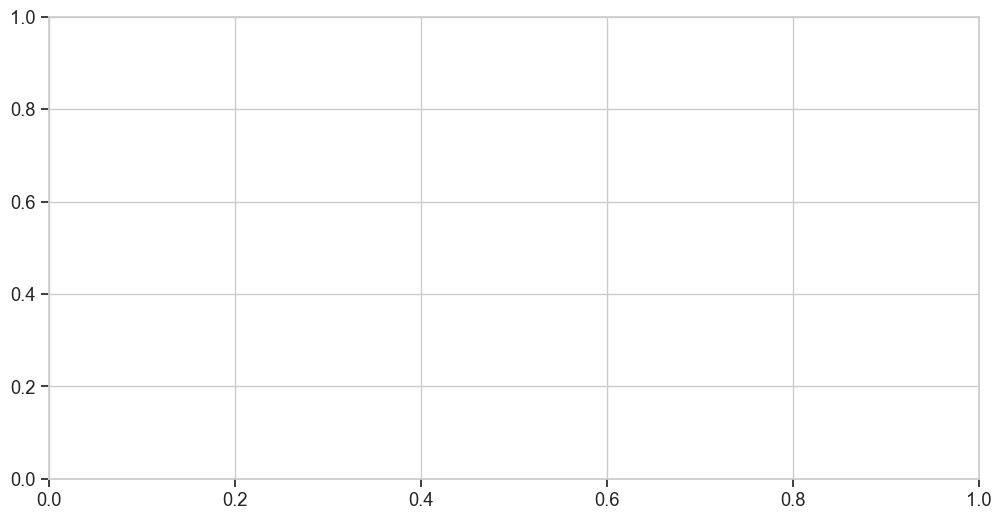

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from collections import Counter
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from io import StringIO

# Use a modern, attractive style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create a beautiful color palette
colors = sns.color_palette("viridis", 10)
blue_gradient = LinearSegmentedColormap.from_list("blue_grad", ["#c6e3fa", "#1e3799"])

# Sample data or file path
data = """
"id","userId","timestamp","keyPressed","isCheating","riskScore","typingPattern","typingSpeed"
"1","2","2025-03-15 14:33:20.481","b",,,,
"2","2","2025-03-15 14:33:21.101","s",,,,
"3","2","2025-03-15 14:33:22.005","k",,,,
"4","2","2025-03-15 14:33:23.93","b",,,,
"5","2","2025-03-15 14:33:24.245","s",,,,
"6","2","2025-03-15 14:33:24.461","d",,,,
"7","2","2025-03-15 14:33:24.747","k",,,,
"8","2","2025-03-15 14:33:25.181","b",,,,
"9","2","2025-03-15 14:33:25.846","k",,,,
"""

# Read data
try:
    # Try to read from file
    df = pd.read_csv('Keystroke.csv')
    print("Reading from keystroke.csv file")
except:
    # If file not found, use sample data
    df = pd.read_csv(StringIO(data))
    print("Using sample data")

# Data preprocessing
df['userId'] = df['userId'].astype(str)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['millisecond'] = df['timestamp'].dt.microsecond // 1000

# Sort by timestamp
df = df.sort_values(['userId', 'timestamp'])

# Calculate time between keystrokes
df['time_diff'] = df.groupby('userId')['timestamp'].diff().dt.total_seconds()

# Create output directory
import os
output_dir = 'keystroke_visuals'
os.makedirs(output_dir, exist_ok=True)

# 1. Keystroke Frequency Heatmap
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

# Create a matrix of keystroke counts per minute
# Use a wider time window for better visualization
keystroke_times = df.copy()
keystroke_times['minute_bin'] = keystroke_times['timestamp'].dt.floor('1min')
time_matrix = keystroke_times.groupby(['userId', 'minute_bin']).size().unstack(fill_value=0)

# Plot heatmap
if not time_matrix.empty:
    sns.heatmap(time_matrix, cmap=blue_gradient, ax=ax, 
                cbar_kws={'label': 'Keystrokes per Minute'})
    ax.set_title('Keystroke Activity Over Time', fontsize=16, pad=20)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('User ID', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/keystroke_heatmap.png', dpi=300, bbox_inches='tight')
else:
    print("Not enough data for heatmap visualization")
plt.close()

# 2. Key Distribution Pie Chart
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))

# Count occurrences of each key
key_counts = df['keyPressed'].value_counts()

# Create a pie chart with beautiful styling
wedges, texts, autotexts = ax.pie(
    key_counts, 
    labels=key_counts.index, 
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 2},
    textprops={'fontsize': 14},
    colors=plt.cm.viridis(np.linspace(0, 1, len(key_counts)))
)

# Style the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Distribution of Keys Pressed', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/key_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# 3. Typing Speed Timeline
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate typing speed (keystrokes per second) in rolling windows
df_speed = df.copy()
df_speed['rolling_count'] = df_speed.groupby('userId')['id'].rolling(window='2s', min_periods=1).count()
df_speed['typing_speed'] = df_speed['rolling_count'] / 2  # Keystrokes per second

# Plot the typing speed over time
for user_id in df_speed['userId'].unique():
    user_data = df_speed[df_speed['userId'] == user_id]
    ax.plot(user_data['timestamp'], user_data['typing_speed'], 
            label=f'User {user_id}', 
            marker='o', markersize=5, 
            linewidth=2, alpha=0.8)

ax.set_title('Typing Speed Over Time', fontsize=16, pad=20)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Keystrokes per Second', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('#ffffff')

# Format x-axis to show time clearly
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

if len(df_speed['userId'].unique()) > 1:
    ax.legend(title='User ID', frameon=True, framealpha=0.9, loc='upper right')

plt.tight_layout()
plt.savefig(f'{output_dir}/typing_speed.png', dpi=300, bbox_inches='tight')
plt.close()

# 4. Inter-keystroke Interval Distribution
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

# Filter out NaN values
valid_intervals = df['time_diff'].dropna()

if not valid_intervals.empty:
    # Create histogram of inter-keystroke intervals
    sns.histplot(
        valid_intervals, 
        bins=15, 
        kde=True, 
        color=colors[2],
        edgecolor='white',
        alpha=0.7,
        ax=ax
    )
    
    # Add vertical line for average
    avg_interval = valid_intervals.mean()
    ax.axvline(x=avg_interval, color='red', linestyle='--', linewidth=2, 
               label=f'Average: {avg_interval:.2f} seconds')
    
    ax.set_title('Distribution of Inter-keystroke Intervals', fontsize=16, pad=20)
    ax.set_xlabel('Time Between Keystrokes (seconds)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.legend()
    
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_facecolor('#f8f9fa')
    fig.patch.set_facecolor('#ffffff')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/keystroke_intervals.png', dpi=300, bbox_inches='tight')
else:
    print("Not enough data for interval distribution visualization")
plt.close()

# 5. Keystroke Rhythm Visualization
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(12, 6))

# Create a timeline of keystroke events
for i, row in df.iterrows():
    # Plot each keystroke
    ax.scatter(
        row['timestamp'], 
        0, 
        s=100, 
        alpha=0.7,
        color=plt.cm.tab10(ord(row['keyPressed']) % 10), 
        edgecolor='black',
        linewidth=0.5
    )
    
    # Add key label
    ax.annotate(
        row['keyPressed'],
        (row['timestamp'], 0),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# Format x-axis for better readability
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S.%f')[:-3])
plt.xticks(rotation=45)

ax.set_title('Keystroke Rhythm Timeline', fontsize=16, pad=20)
ax.set_xlabel('Time', fontsize=14)
ax.grid(True, axis='x', linestyle='--', alpha=0.3)
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('#ffffff')

plt.tight_layout()
plt.savefig(f'{output_dir}/keystroke_rhythm.png', dpi=300, bbox_inches='tight')
plt.close()

print(f"All visualizations have been saved to '{output_dir}' directory")

# Display a summary of the analysis
print("\nKeystroke Analysis Summary:")
print(f"Total keystrokes: {len(df)}")
print(f"Number of unique users: {df['userId'].nunique()}")
print(f"Most common key: {df['keyPressed'].value_counts().idxmax()}")
if not valid_intervals.empty:
    print(f"Average time between keystrokes: {valid_intervals.mean():.2f} seconds")